In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [54]:
df1 = pd.read_csv('C:/travail/esilv/Dorset/IA/titanic/test.csv')

In [55]:
print(df1)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [56]:
def concat_df(train_data, data_test):
    return pd.concat([train_data, data_test], sort = True).reset_index(drop=True)

In [57]:
df2 = pd.read_csv("C:/travail/esilv/Dorset/IA/titanic/train.csv")

In [58]:
print(df2)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [59]:
type(df2)

pandas.core.frame.DataFrame

In [60]:
df3 = pd.read_csv("C:/travail/esilv/Dorset/IA/titanic/gender_submission.csv")

In [61]:
merged_df = pd.merge(df1, df3, on='PassengerId')

In [62]:
df = concat_df(df2,merged_df)

In [63]:
df.head()

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1         0         A/5 21171  
1       1  female      1         1          PC 17599  
2       3  female      0         1  STON/O2. 3101282  
3       1  female      1         1            113803  
4       3    male      0         0            373450

In [64]:
print("Dataset shape: ", df.shape)
print("Dataset size: ", df.size)

Dataset shape:  (1309, 12)
Dataset size:  15708


In [65]:
print("Data types: \n", df.dtypes)

Data types: 
 Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived         int64
Ticket          object
dtype: object


In [66]:
print("Number of missing values per column: \n", df.isnull().sum())

Number of missing values per column: 
 Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64


In [67]:
print("Number of duplicated rows: ", df.duplicated().sum())

Number of duplicated rows:  0


In [68]:
print(df.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1         0         A/5 21171  
1       1  female      1         1          PC 17599  
2       3  female      0         1  STON/O2. 3101282  
3       1  female      1         1            113803  
4       3    male      0         0            373450  


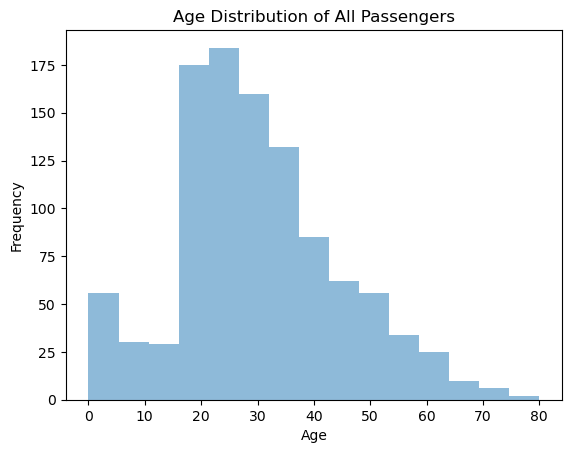

In [69]:
plt.hist(df['Age'].dropna(), bins=15, range=[0, 80], alpha=0.5)

plt.title('Age Distribution of All Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

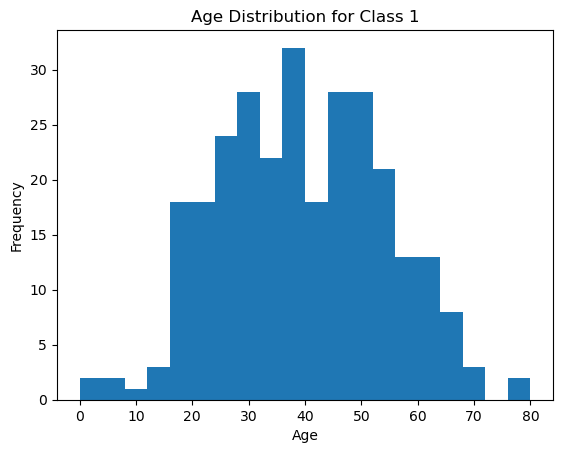

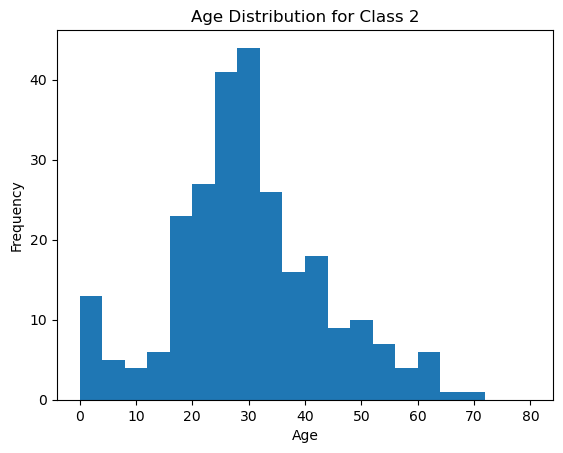

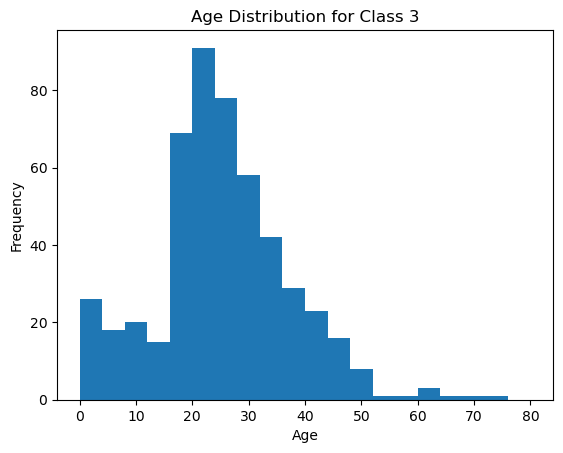

In [70]:
classes = df.groupby('Pclass')

for name, group in classes:
    fig, ax = plt.subplots()
    ax.hist(group['Age'].dropna(), bins=20, range=[0, 80])
    ax.set_title(f'Age Distribution for Class {name}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')

plt.show()

In [71]:
women = df.loc[df['Sex'] == 'female']
nb_women_survived = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1)])
print("Nb of women that survived : ", nb_women_survived)
man = df.loc[df['Sex'] == 'male'] 
nb_men_survived = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1)])
print("nb of men that survived:",nb_men_survived)
n_males= df["Sex"].value_counts()["male"]
n_females= df["Sex"].value_counts()["female"]
percentage_man_s = (109/n_males)*100
percentage_woman_s = (385/n_females)*100
print("Percentage of man that survived", percentage_man_s)
print("Percentage of woman that survived", percentage_woman_s)

Nb of women that survived :  385
nb of men that survived: 109
Percentage of man that survived 12.930011862396205
Percentage of woman that survived 82.61802575107296


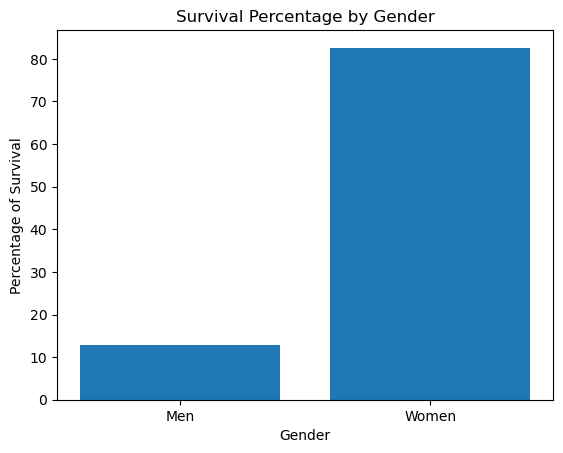

In [72]:

percentage_of_man_survived = 12.930011862396205
percentage_of_woman_survived = 82.61802575107296
plt.bar(['Men', 'Women'], [percentage_of_man_survived, percentage_of_woman_survived])
plt.title('Survival Percentage by Gender')
plt.ylabel('Percentage of Survival')
plt.xlabel('Gender')
plt.show()

In [73]:
mean_dead_age = df.loc[df['Survived'] == 0, 'Age'].mean()
print("mean of the age of passengers that died", mean_dead_age)

mean of the age of passengers that died 30.510985691573925


In [74]:
df.describe()

Age         Fare        Parch  PassengerId       Pclass  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.295479     0.385027   655.000000     2.294882   
std      14.413493    51.758668     0.865560   378.020061     0.837836   
min       0.170000     0.000000     0.000000     1.000000     1.000000   
25%      21.000000     7.895800     0.000000   328.000000     2.000000   
50%      28.000000    14.454200     0.000000   655.000000     3.000000   
75%      39.000000    31.275000     0.000000   982.000000     3.000000   
max      80.000000   512.329200     9.000000  1309.000000     3.000000   

             SibSp     Survived  
count  1309.000000  1309.000000  
mean      0.498854     0.377387  
std       1.041658     0.484918  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       1.000000     1.000000  
max       8.000000     1.000000

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Survived'}>, <Axes: >, <Axes: >]],
      dtype=object)

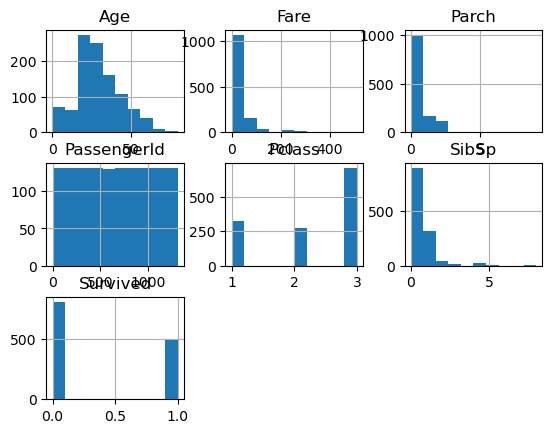

In [75]:
df.hist()

In [76]:
df.corr()

C:\Users\basti\AppData\Local\Temp\ipykernel_9304\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Age      Fare     Parch  PassengerId    Pclass     SibSp  \
Age          1.000000  0.178740 -0.150917     0.028814 -0.408106 -0.243699   
Fare         0.178740  1.000000  0.221539     0.031428 -0.558629  0.160238   
Parch       -0.150917  0.221539  1.000000     0.008942  0.018322  0.373587   
PassengerId  0.028814  0.031428  0.008942     1.000000 -0.038354 -0.055224   
Pclass      -0.408106 -0.558629  0.018322    -0.038354  1.000000  0.060832   
SibSp       -0.243699  0.160238  0.373587    -0.055224  0.060832  1.000000   
Survived    -0.053695  0.233622  0.108919    -0.020370 -0.264710  0.002370   

             Survived  
Age         -0.053695  
Fare         0.233622  
Parch        0.108919  
PassengerId -0.020370  
Pclass      -0.264710  
SibSp        0.002370  
Survived     1.000000

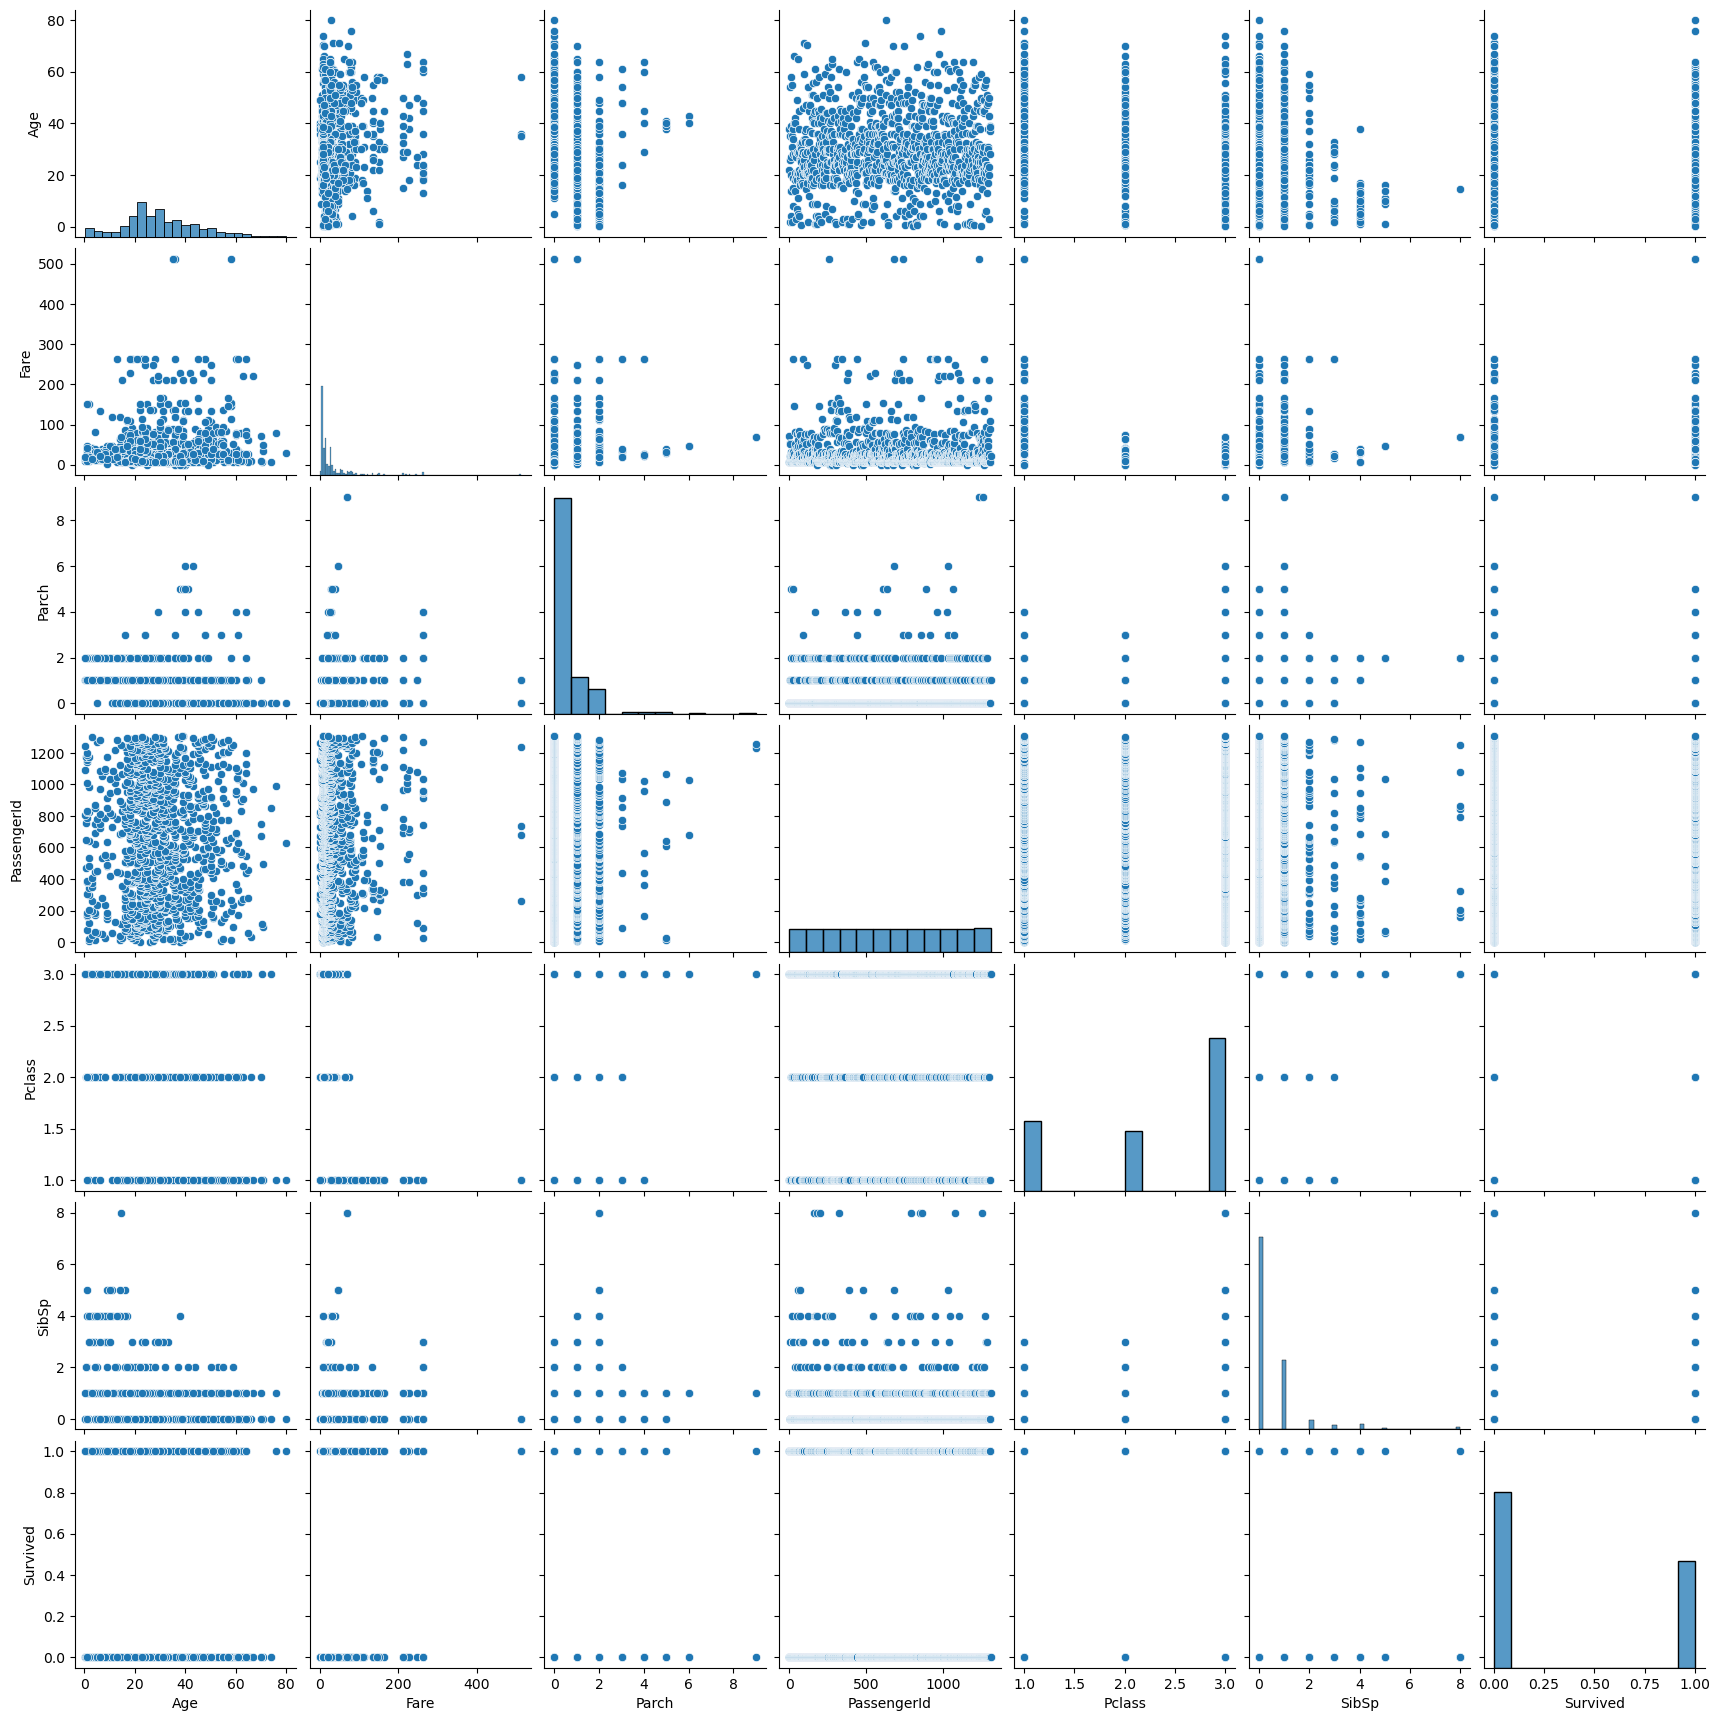

In [77]:
sns.pairplot(df)

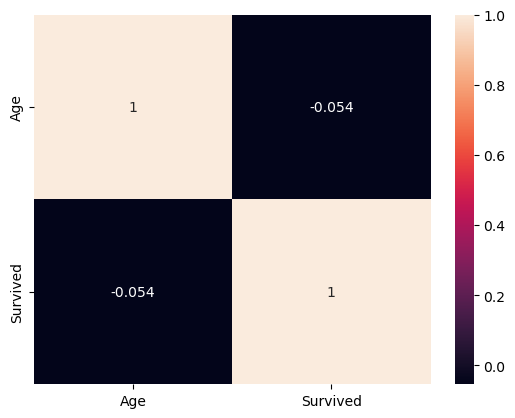

In [78]:
sns.heatmap(df[['Age', 'Survived']].corr(), annot=True)
plt.show()

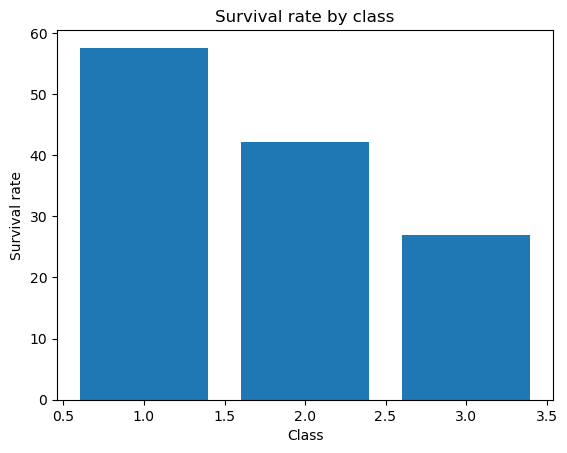

In [79]:
survival_rates = df.groupby('Pclass')['Survived'].mean() * 100
plt.bar(survival_rates.index, survival_rates.values)
plt.title('Survival rate by class')
plt.xlabel('Class')
plt.ylabel('Survival rate')
plt.show()

In [80]:
table = pd.crosstab(df['Survived'], df['Sex'])
print(table)

Sex       female  male
Survived              
0             81   734
1            385   109


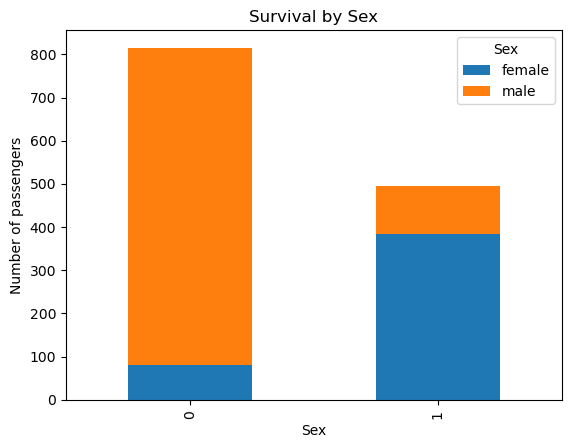

In [81]:
table.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Number of passengers')
plt.title('Survival by Sex')
plt.show()

In [82]:
df_num = df[['Age','SibSp','Parch','Fare']]
df_cat= df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

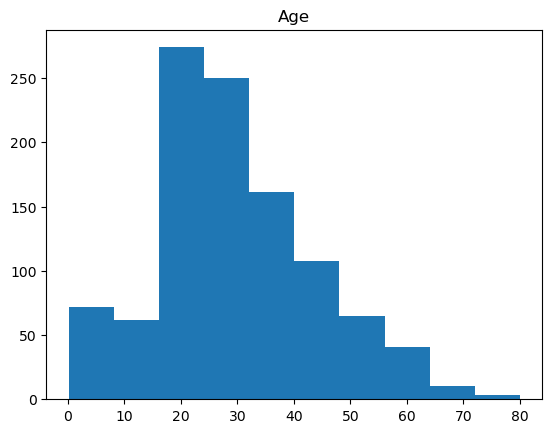

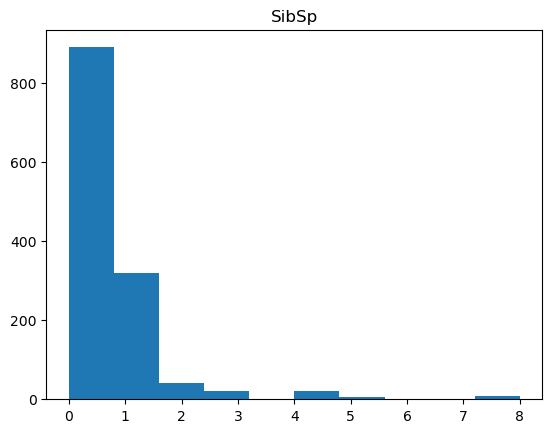

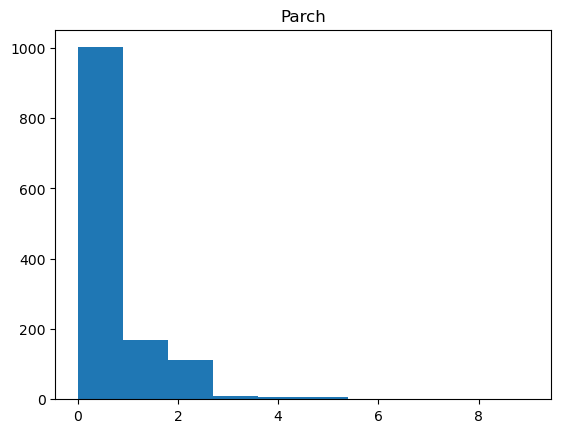

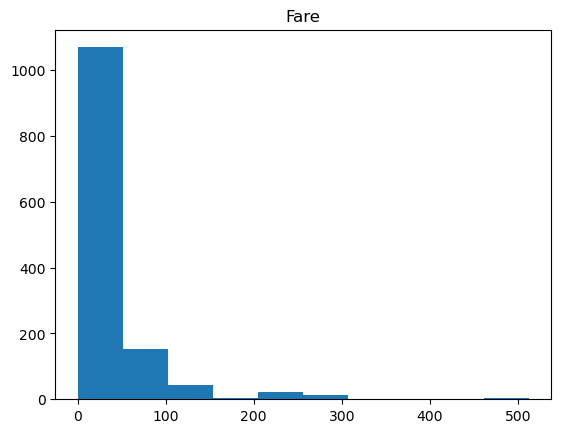

In [83]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.243699 -0.150917  0.178740
SibSp -0.243699  1.000000  0.373587  0.160238
Parch -0.150917  0.373587  1.000000  0.221539
Fare   0.178740  0.160238  0.221539  1.000000


<Axes: >

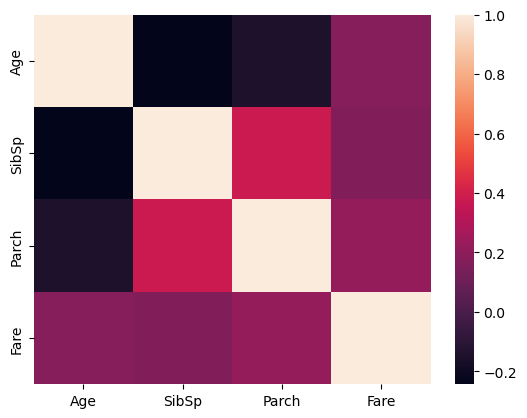

In [84]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [86]:
print("Number of missing values per column: \n", df2.isnull().sum())

Number of missing values per column: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [87]:
print(type(df2))

<class 'pandas.core.frame.DataFrame'>


In [88]:
df2.drop(["Ticket","PassengerId","Name","Cabin"],axis=1,inplace=True)
df2.dropna(inplace=True)

In [89]:
noint=['Sex','Age','Fare','Embarked']

In [90]:
type(df2)

pandas.core.frame.DataFrame

In [91]:
df5 = pd.get_dummies(df2[noint])
final = pd.concat([df2,df5],axis=1)
final.drop(noint,axis=1,inplace=True)


In [92]:
merged_df = merged_df.dropna(subset=['Age'])
merged_df=merged_df.drop(["Ticket","PassengerId","Name","Cabin"],axis=1)

In [93]:
test = pd.get_dummies(merged_df[noint])
test = pd.concat([merged_df,test],axis=1)
test.drop(noint,axis=1,inplace=True)

In [94]:
Y_train = final["Survived"]
X_train = final.drop("Survived", axis = 1)
Y_test = test["Survived"]
X_test = test.drop("Survived", axis=1)

In [95]:
model = LogisticRegression(max_iter=110)

In [96]:
Y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 712 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
712 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB


In [97]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=110)

In [98]:
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, y_pred))
print('Precision:', precision_score(Y_test, y_pred))
print('Recall:', recall_score(Y_test, y_pred))


Accuracy: 0.927710843373494
Precision: 0.8503401360544217
Recall: 0.984251968503937


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1, 10],
              'solver': ['liblinear', 'saga']}

model = LogisticRegression(max_iter=10000)
grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, Y_train)

best_model = grid.best_estimator_
accuracy = best_model.score(X_test, Y_test)

print(f"Best hyperparameters : {grid.best_params_}")
print(f"Accuracy : {accuracy}")

Best hyperparameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 1.0


In [100]:
y_pred=best_model.predict(X_test)

In [101]:
print(accuracy_score(Y_test,y_pred))

1.0


<Axes: >

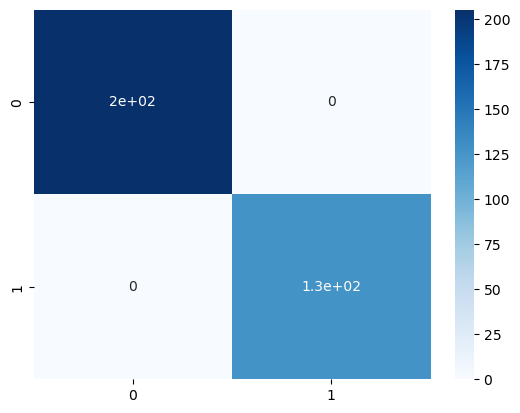

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = best_model.predict(X_test)

conf_mat = confusion_matrix(Y_test, y_pred)

sns.heatmap(conf_mat, annot=True, cmap="Blues")
